<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D6_LC2_Auto_ML_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Auto ML for Machine Learning (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


We will look at how to solve a classification problem using a variety of Auto-ML methods and libraries:

- H2O
- TPOT
- FLAML

# Auto ML for Machine Learning (Live coding)

## Load Dependencies

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=8f8d4a7e7cd00b685c8236ac81b966898431f6c5be8d31c3e36a230439eaef79
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 700.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=b336d5f3a1d53be29762237950c118ceab7c41f68384111614eaa4c06d40ef53
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 4.6 MB/s eta 0:00:00


#### Remember to Restart Runtime on Colab before proceeding

#### Install Check

Scikit Learn should be >= 1.2 at least

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Data Generation

We will be using the standard Boston Housing Dataset as a classification problem

Boston Houses Classification

- Price > \$ 30K is Class Label 1

- Price <= \$ 30K is Class Label 0

In [ ]:
# boston.csv
data_file='https://drive.google.com/uc?export=download&id=1cnIxAAqXnG9vHO59EuRBbnit_3rM_UOT'
df = pd.read_csv(data_file)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns = df.columns.str.upper()
df.rename(columns={'BLACK': 'B', 'MEDV': 'Price'}, inplace=True)
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df['Price'] = df['Price'].apply(lambda x: 1 if x > 30 else 0)

In [ ]:
X = df.drop('Price', axis=1).copy()
y = df['Price']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Price, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


## H2O AutoML: Automatic Machine Learning

Here we will use the `h2o` library to build classification models. Do check out the [package documentation](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#) when needed.

### Load Dependencies

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmjfb0o90
  JVM stdout: /tmp/tmpmjfb0o90/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmjfb0o90/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_cyfl41
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Price'] = train_data['Price'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
15.0234,0,18.1,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,0
0.62739,0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21,395.62,8.47,0
0.03466,35,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,0
7.05042,0,18.1,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,0
0.7258,0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21,390.95,11.28,0
0.19186,0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,0
0.03961,0,5.19,0,0.515,6.037,34.5,5.9853,5,224,20.2,396.9,8.01,0
0.02055,85,0.74,0,0.41,6.383,35.7,9.1876,2,313,17.3,396.9,5.77,0
15.1772,0,18.1,0,0.74,6.152,100,1.9142,24,666,20.2,9.32,26.45,0
14.4383,0,18.1,0,0.597,6.852,100,1.4655,24,666,20.2,179.36,19.78,0


In [ ]:
train_data.types

{'CRIM': 'real',
 'ZN': 'real',
 'INDUS': 'real',
 'CHAS': 'int',
 'NOX': 'real',
 'RM': 'real',
 'AGE': 'real',
 'DIS': 'real',
 'RAD': 'int',
 'TAX': 'int',
 'PTRATIO': 'real',
 'B': 'real',
 'LSTAT': 'real',
 'Price': 'enum'}

### Create Auto-ML Modeling Strategy

In [ ]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y=y_train.name, training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_2_20231217_191212


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    38                 38                          12632                  5            10           7.63158       14            31            21.7895

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03280278799891183
RMSE: 0.18111539967355572
LogLoss: 0.1885614069896225
Mean Per-Class Error: 0.05166990853784712
AUC: 0.9831974506476845
AUCPR: 0.9506248365037563
Gini: 0.966394901295369

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      324  7    0.0211   (7.0/331.0)
1      6    67   0.0822   (6.0/73.0)
Total  330  74   0.0322   (13.0/404.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.5          0.911565  39
max f2                       0.368421     0.92246   46
max f0point5                 0.545455     0.913043  36
max accuracy                 0.5          0.967822  39
max precision                1            1         0
max recall                   0            1         78
max specificity              1            1         0
max absolute_mcc             0.5          0.891929  39
max min_per_class_accuracy   0.368421     0.945205  46
max mean_per_class_accuracy  0.222222     0.953069  55
max tns                      1            331       0
max fns                      1            60        0
max fps                      0            331       78
max tps                      0            73        78
max tnr                      1            1         0
max fnr                      1            0.821918  0
max fpr                      0            1         78
max tpr                      0            1         78

Gains/Lift Table: Avg response rate: 18.07 %, avg score: 17.77 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0321782                   1                  5.53425   5.53425            1                1           1                           1                   0.178082        0.178082                   453.425   453.425            0.178082
2        0.0321782                   0.9995             0         5.53425            0                0           1                           1                   0               0.178082                   -100      453.425            0.178082
3        0.0420792                   0.943611           5.53425   5.53425            1                0.963889    1                           0.991503            0.0547945       0.232877                   453.425   453.425            0.232877
4        0.0569307                   0.933333           5.53425   5.53425            1                0.934028    1                           0.97651             0.0821918       0.315068                   453.425   453.425            0.315068
5        0.101485                    0.821925           5.22679   5.39926            0.944444         0.878367    0.97561                     0.933423            0.232877        0.547945         

### View Model Leaderboard

In [ ]:
# View the AutoML Leaderboard
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_2_20231217_191212,0.990192,0.117893,0.960122,0.0653685,0.183698,0.0337448,244,0.040437,DRF
GBM_grid_1_AutoML_2_20231217_191212_model_3,0.98866,0.0997077,0.962918,0.0386748,0.167943,0.028205,512,0.035692,GBM
GBM_4_AutoML_2_20231217_191212,0.988412,0.109259,0.957465,0.0554981,0.168325,0.0283332,503,0.042912,GBM
GBM_5_AutoML_2_20231217_191212,0.98717,0.115994,0.957657,0.0478417,0.183917,0.0338253,379,0.031608,GBM
GBM_3_AutoML_2_20231217_191212,0.986839,0.109234,0.956192,0.0531805,0.173079,0.0299564,399,0.029637,GBM
GBM_grid_1_AutoML_2_20231217_191212_model_1,0.986715,0.115695,0.948451,0.0722179,0.186096,0.0346317,572,0.048784,GBM
GBM_grid_1_AutoML_2_20231217_191212_model_4,0.986219,0.115684,0.949669,0.0828953,0.183932,0.0338309,517,0.049938,GBM
StackedEnsemble_AllModels_1_AutoML_2_20231217_191212,0.986012,0.113172,0.936346,0.04331,0.172917,0.0299002,7371,0.265056,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20231217_191212,0.98597,0.11655,0.934948,0.0394819,0.174224,0.0303539,4139,0.095048,StackedEnsemble
GBM_grid_1_AutoML_2_20231217_191212_model_2,0.985474,0.111881,0.952169,0.0516699,0.176587,0.031183,650,0.033818,GBM


### Predict with top models and Evaluate Performance

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



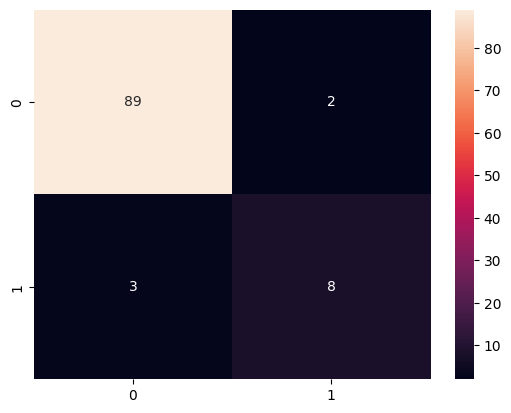

In [ ]:
best_model =  aml.get_best_model()
X_test_h2o = h2o.H2OFrame.from_python(X_test)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



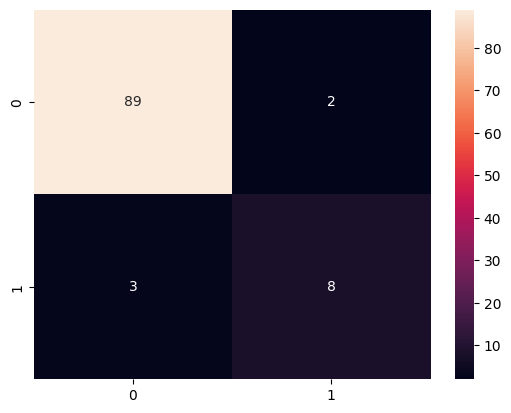

In [ ]:
specific_model =  h2o.get_model('StackedEnsemble_AllModels_1_AutoML_2_20231217_191212')
y_pred = specific_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.82      0.82      0.82        11

    accuracy                           0.96       102
   macro avg       0.90      0.90      0.90       102
weighted avg       0.96      0.96      0.96       102



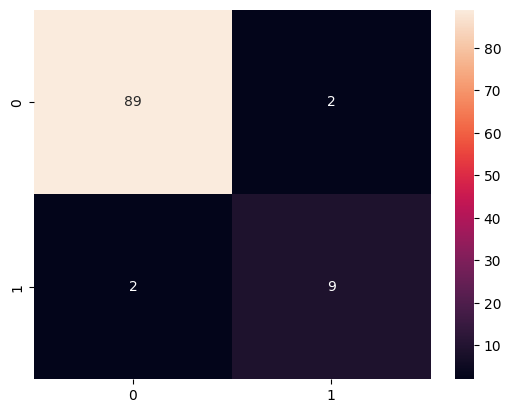

In [ ]:
specific_model =  aml.get_best_model(criterion="logloss")
y_pred = specific_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);

In [ ]:
specific_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20231217_191212_model_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    77                 77                          15428                  5            6            5.97403       7             15            11.3766

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.002630170988048533
RMSE: 0.05128519267828223
LogLoss: 0.01879466745695493
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5086934391511305
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      331  0    0        (0.0/331.0)
1      0    73   0        (0.0/73.0)
Total  331  73   0        (0.0/404.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.508693     1         72
max f2                       0.508693     1         72
max f0point5                 0.508693     1         72
max accuracy                 0.508693     1         72
max precision                0.997535     1         0
max recall                   0.508693     1         72
max specificity              0.997535     1         0
max absolute_mcc             0.508693     1         72
max min_per_class_accuracy   0.508693     1         72
max mean_per_class_accuracy  0.508693     1         72
max tns                      0.997535     331       0
max fns                      0.997535     72        0
max fps                      0.000109171  331       399
max tps                      0.508693     73        72
max tnr                      0.997535     1         0
max fnr                      0.997535     0.986301  0
max fpr                      0.000109171  1         399
max tpr                      0.508693     1         72

Gains/Lift Table: Avg response rate: 18.07 %, avg score: 17.91 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0123762                   0.995604           5.53425  5.53425            1                0.996688     1                           0.996688            0.0684932       0.0684932                  453.425  453.425            0.0684932
2        0.0222772                   0.994975           5.53425  5.53425            1                0.995256     1                           0.996052            0.0547945       0.123288                   453.425  453.425            0.123288
3        0.0321782                   0.994328           5.53425  5.53425            1                0.994573     1                           0.995597            0.0547945       0.178082                   453.425  453.425            0.178082
4        0.0420792                   0.992805           5.53425  5.53425            1                0.993548     1                           0.995115            0.0547945       0.232877                   453.425  453.425            0.232877
5        0.0519802                   0.990929           5.53425  5.53425            1                0.991858     1                           0.994494            0.0547945       0.287671                   453.425  453.425     

## Auto-ML with TPOT

Here we will use the `tpot` library to build classification models. Do check out the [package documentation](https://epistasislab.github.io/tpot) when needed.

TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines using genetic programming.

### Load Dependencies

In [ ]:
from tpot import TPOTClassifier

### Create Auto-ML Modeling Strategy

In [ ]:
tpot_clf = TPOTClassifier(scoring='neg_log_loss',
                          cv=5,
                          max_time_mins=5, # max of 5 mins to try and get the best model
                          random_state=1,
                          verbosity=3)

### Train Models to select Best Approach

In [ ]:
tpot_clf.fit(X_train, y_train)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]

_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=

TPOTClassifier(max_time_mins=5, random_state=1, scoring='neg_log_loss',
               verbosity=3)

### View Training Details

In [ ]:
tpot_clf

TPOTClassifier(max_time_mins=5, random_state=1, scoring='neg_log_loss',
               verbosity=3)

In [ ]:
tpot_clf.fitted_pipeline_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=2,
                                            max_features=0.9500000000000001,
                                            min_samples_leaf=16,
                                            min_samples_split=5, random_state=1,
                                            subsample=0.9000000000000001))])

### Predict and Evaluate Performance

In [ ]:
predictions = tpot_clf.predict(X_test)
predictions[:5]

array([0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



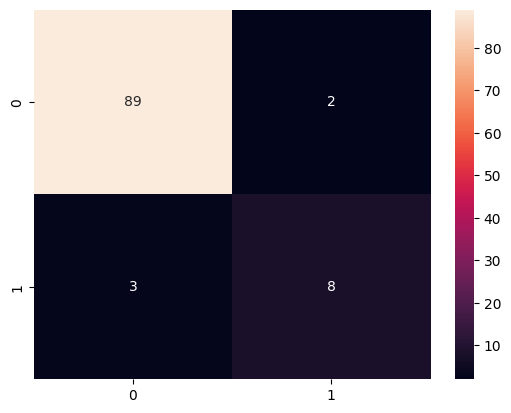

In [ ]:
cf = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
sns.heatmap(cf, annot=True);

## Auto-ML with FLAML

Here we will use the `flaml` library to build classification models. Do check out the [package documentation](https://microsoft.github.io/FLAML/#) when needed.

FLAML is powered by a new, cost-effective hyperparameter optimization and learner selection method invented by Microsoft Research.

FLAML leverages the structure of the search space to choose a search order optimized for both cost and error. For example, the system tends to propose cheap configurations at the beginning stage of the search, but quickly moves to configurations with high model complexity and large sample size when needed in the later stage of the search.

For another example, it favors cheap learners in the beginning but penalizes them later if the error improvement is slow.

The cost-bounded search and cost-based prioritization make a big difference in the search efficiency under budget constraints.

### Load Dependencies and Setup AutoML Strategy

In [ ]:
from flaml import AutoML

automl = AutoML()

automl_settings = {
    "time_budget": 300, # 5 mins to try and select the best model
    "metric": 'f1',
    "task": 'classification',
    "log_file_name": 'mylog.log',
}

### Train Models

In [ ]:
automl.fit(X_train=X_train, y_train=y_train.values,
           **automl_settings)

[flaml.automl.logger: 12-17 19:55:37] {1679} INFO - task = classification
[flaml.automl.logger: 12-17 19:55:37] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 12-17 19:55:37] {1788} INFO - Minimizing error metric: 1-f1
[flaml.automl.logger: 12-17 19:55:37] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 12-17 19:55:37] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-17 19:55:37] {2344} INFO - Estimated sufficient time budget=2710s. Estimated necessary time budget=62s.
[flaml.automl.logger: 12-17 19:55:37] {2391} INFO -  at 0.3s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 12-17 19:55:37] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-17 19:55:38] {2391} INFO -  at 0.5s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 12-17 19:55:38] {2

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 12-17 20:00:37] {2391} INFO -  at 300.0s,	estimator lrl1's best error=0.6364,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:00:37] {2627} INFO - retrain xgb_limitdepth for 0.0s
[flaml.automl.logger: 12-17 20:00:37] {2630} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.5086933112492915, colsample_bynode=None,
              colsample_bytree=0.6306120069350191, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=0.024162635916970876, missing=nan,
              monotone_constraints=None, mu

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### View Best Model

In [ ]:
automl.best_estimator

'xgb_limitdepth'

In [ ]:
automl.best_config

{'n_estimators': 11,
 'max_depth': 6,
 'min_child_weight': 0.024162635916970876,
 'learning_rate': 1.0,
 'subsample': 0.9978568217362944,
 'colsample_bylevel': 0.5086933112492915,
 'colsample_bytree': 0.6306120069350191,
 'reg_alpha': 0.005488592959841232,
 'reg_lambda': 0.9621287550295926}

In [ ]:
automl.model.get_params()

{'n_estimators': 11,
 'max_depth': 6,
 'min_child_weight': 0.024162635916970876,
 'learning_rate': 1.0,
 'subsample': 0.9978568217362944,
 'colsample_bylevel': 0.5086933112492915,
 'colsample_bytree': 0.6306120069350191,
 'reg_alpha': 0.005488592959841232,
 'reg_lambda': 0.9621287550295926,
 'n_jobs': -1,
 'verbosity': 0,
 'task': <flaml.automl.task.generic_task.GenericTask at 0x7cd3540fbf40>,
 '_estimator_type': 'classifier'}

### Evaluate Model Performance

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        91
           1       0.89      0.73      0.80        11

    accuracy                           0.96       102
   macro avg       0.93      0.86      0.89       102
weighted avg       0.96      0.96      0.96       102



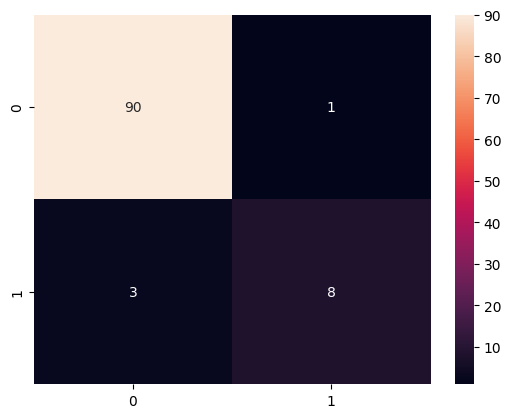

In [ ]:
predictions = automl.predict(X_test)
cf = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
sns.heatmap(cf, annot=True);

## FLAML AutoML with Ensembling

In [ ]:
automl = AutoML()

automl_settings = {
    "time_budget": 300,
    "metric": 'f1',
    "task": 'classification',
    "log_file_name": 'mylog.log',
}

In [ ]:
automl.fit(X_train=X_train, y_train=y_train.values, ensemble=True,
           **automl_settings)

[flaml.automl.logger: 12-17 20:01:03] {1679} INFO - task = classification
[flaml.automl.logger: 12-17 20:01:03] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 12-17 20:01:03] {1788} INFO - Minimizing error metric: 1-f1
[flaml.automl.logger: 12-17 20:01:03] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 12-17 20:01:03] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-17 20:01:03] {2344} INFO - Estimated sufficient time budget=570s. Estimated necessary time budget=13s.
[flaml.automl.logger: 12-17 20:01:03] {2391} INFO -  at 0.1s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 12-17 20:01:03] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-17 20:01:03] {2391} INFO -  at 0.2s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 12-17 20:01:03] {22

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:08] {2391} INFO -  at 184.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:08] {2218} INFO - iteration 532, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:09] {2391} INFO -  at 185.4s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:09] {2218} INFO - iteration 533, current learner xgboost
[flaml.automl.logger: 12-17 20:04:10] {2391} INFO -  at 186.4s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:10] {2218} INFO - iteration 534, current learner lrl1
[flaml.automl.logger: 12-17 20:04:10] {2391} INFO -  at 186.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:10] {2218} INFO - iteration 535, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:10] {2391} INFO -  at 186.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:10] {2218} INFO - iteration 536, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:10] {2391} INFO -  at 187.0s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:10] {2218} INFO - iteration 537, current learner lrl1
[flaml.automl.logger: 12-17 20:04:10] {2391} INFO -  at 187.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:10] {2218} INFO - iteration 538, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:10] {2391} INFO -  at 187.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:10] {2218} INFO - iteration 539, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:11] {2391} INFO -  at 187.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:11] {2218} INFO - iteration 540, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:11] {2391} INFO -  at 187.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:11] {2218} INFO - iteration 541, current learner lrl1
[flaml.automl.logger: 12-17 20:04:11] {2391} INFO -  at 187.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:11] {2218} INFO - iteration 542, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:11] {2391} INFO -  at 188.0s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:11] {2218} INFO - iteration 543, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:11] {2391} INFO -  at 188.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:11] {2218} INFO - iteration 544, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:11] {2391} INFO -  at 188.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:11] {2218} INFO - iteration 545, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:12] {2391} INFO -  at 188.5s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:12] {2218} INFO - iteration 546, current learner lrl1
[flaml.automl.logger: 12-17 20:04:12] {2391} INFO -  at 188.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:12] {2218} INFO - iteration 547, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:12] {2391} INFO -  at 188.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:12] {2218} INFO - iteration 548, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:12] {2391} INFO -  at 189.0s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:12] {2218} INFO - iteration 549, current learner lrl1
[flaml.automl.logger: 12-17 20:04:12] {2391} INFO -  at 189.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:12] {2218} INFO - iteration 550, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:12] {2391} INFO -  at 189.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:12] {2218} INFO - iteration 551, current learner lgbm
[flaml.automl.logger: 12-17 20:04:13] {2391} INFO -  at 189.6s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:13] {2218} INFO - iteration 552, current learner lrl1
[flaml.automl.logger: 12-17 20:04:13] {2391} INFO -  at 189.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:13] {2218} INFO - iteration 553, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:13] {2391} INFO -  at 189.9s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:13] {2218} INFO - iteration 554, current learner lrl1
[flaml.automl.logger: 12-17 20:04:13] {2391} INFO -  at 190.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:13] {2218} INFO - iteration 555, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:13] {2391} INFO -  at 190.2s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:13] {2218} INFO - iteration 556, current learner extra_tree
[flaml.automl.logger: 12-17 20:04:14] {2391} INFO -  at 191.0s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:14] {2218} INFO - iteration 557, current learner lrl1
[flaml.automl.logger: 12-17 20:04:14] {2391} INFO -  at 191.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:14] {2218} INFO - iteration 558, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:14] {2391} INFO -  at 191.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:14] {2218} INFO - iteration 559, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:15] {2391} INFO -  at 191.5s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:15] {2218} INFO - iteration 560, current learner lgbm
[flaml.automl.logger: 12-17 20:04:15] {2391} INFO -  at 191.9s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:15] {2218} INFO - iteration 561, current learner xgboost
[flaml.automl.logger: 12-17 20:04:15] {2391} INFO -  at 192.1s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:15] {2218} INFO - iteration 562, current learner lrl1
[flaml.automl.logger: 12-17 20:04:15] {2391} INFO -  at 192.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:15] {2218} INFO - iteration 563, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:16] {2391} INFO -  at 192.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:16] {2218} INFO - iteration 564, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:16] {2391} INFO -  at 192.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:16] {2218} INFO - iteration 565, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:16] {2391} INFO -  at 193.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:16] {2218} INFO - iteration 566, current learner lgbm
[flaml.automl.logger: 12-17 20:04:17] {2391} INFO -  at 193.9s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:17] {2218} INFO - iteration 567, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:18] {2391} INFO -  at 194.7s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:18] {2218} INFO - iteration 568, current learner lrl1
[flaml.automl.logger: 12-17 20:04:18] {2391} INFO -  at 194.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:18] {2218} INFO - iteration 569, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:19] {2391} INFO -  at 195.7s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:19] {2218} INFO - iteration 570, current learner lrl1
[flaml.automl.logger: 12-17 20:04:19] {2391} INFO -  at 195.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:19] {2218} INFO - iteration 571, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:19] {2391} INFO -  at 196.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:19] {2218} INFO - iteration 572, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:19] {2391} INFO -  at 196.2s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:19] {2218} INFO - iteration 573, current learner lrl1
[flaml.automl.logger: 12-17 20:04:20] {2391} INFO -  at 196.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:20] {2218} INFO - iteration 574, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:20] {2391} INFO -  at 196.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:20] {2218} INFO - iteration 575, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:20] {2391} INFO -  at 196.8s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:20] {2218} INFO - iteration 576, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:20] {2391} INFO -  at 196.9s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:20] {2218} INFO - iteration 577, current learner lrl1
[flaml.automl.logger: 12-17 20:04:20] {2391} INFO -  at 197.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:20] {2218} INFO - iteration 578, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:20] {2391} INFO -  at 197.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:20] {2218} INFO - iteration 579, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:21] {2391} INFO -  at 197.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:21] {2218} INFO - iteration 580, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:21] {2391} INFO -  at 197.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:21] {2218} INFO - iteration 581, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:21] {2391} INFO -  at 197.7s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:21] {2218} INFO - iteration 582, current learner xgboost
[flaml.automl.logger: 12-17 20:04:21] {2391} INFO -  at 198.0s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:21] {2218} INFO - iteration 583, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:21] {2391} INFO -  at 198.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:21] {2218} INFO - iteration 584, current learner lrl1
[f

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:22] {2391} INFO -  at 198.4s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:22] {2218} INFO - iteration 586, current learner lrl1
[flaml.automl.logger: 12-17 20:04:22] {2391} INFO -  at 198.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:22] {2218} INFO - iteration 587, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:22] {2391} INFO -  at 199.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:22] {2218} INFO - iteration 588, current learner lrl1
[flaml.automl.logger: 12-17 20:04:22] {2391} INFO -  at 199.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:22] {2218} INFO - iteration 589, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:23] {2391} INFO -  at 199.5s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:23] {2218} INFO - iteration 590, current learner lrl1
[flaml.automl.logger: 12-17 20:04:23] {2391} INFO -  at 199.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:23] {2218} INFO - iteration 591, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:23] {2391} INFO -  at 199.8s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:23] {2218} INFO - iteration 592, current learner lrl1
[flaml.automl.logger: 12-17 20:04:23] {2391} INFO -  at 200.0s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:23] {2218} INFO - iteration 593, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:23] {2391} INFO -  at 200.2s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:23] {2218} INFO - iteration 594, current learner rf
[flaml.automl.logger: 12-17 20:04:24] {2391} INFO -  at 201.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:24] {2218} INFO - iteration 595, current learner lrl1
[flaml.automl.logger: 12-17 20:04:24] {2391} INFO -  at 201.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:24] {2218} INFO - iteration 596, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:25] {2391} INFO -  at 201.5s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:25] {2218} INFO - iteration 597, current learner lrl1
[flaml.automl.logger: 12-17 20:04:25] {2391} INFO -  at 201.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:25] {2218} INFO - iteration 598, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:25] {2391} INFO -  at 201.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:25] {2218} INFO - iteration 599, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:25] {2391} INFO -  at 202.3s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:25] {2218} INFO - iteration 600, current learner rf
[flaml.automl.logger: 12-17 20:04:26] {2391} INFO -  at 203.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:26] {2218} INFO - iteration 601, current learner rf
[flaml.automl.logger: 12-17 20:04:27] {2391} INFO -  at 203.7s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:27] {2218} INFO - iteration 602, current learner lgbm
[flaml.automl.logger: 12-17 20:04:27] {2391} INFO -  at 204.0s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:27] {2218} INFO - iteration 603, current learner xgboost
[flaml.automl.logger: 12-17 20:04:27] {2391} INFO -  at

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:28] {2391} INFO -  at 204.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:28] {2218} INFO - iteration 608, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:28] {2391} INFO -  at 205.1s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:28] {2218} INFO - iteration 609, current learner rf
[flaml.automl.logger: 12-17 20:04:29] {2391} INFO -  at 206.1s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:29] {2218} INFO - iteration 610, current learner rf
[flaml.automl.logger: 12-17 20:04:30] {2391} INFO -  at 206.8s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:30] {2218} INFO - iteration 611, current learner lrl1
[flaml.automl.logger: 12-17 20:04:30] {2391} INFO -  at 207.0s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:30] {2218} INFO - iteration 612, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:30] {2391} INFO -  at 207.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:30] {2218} INFO - iteration 613, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:31] {2391} INFO -  at 207.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:31] {2218} INFO - iteration 614, current learner xgboost
[flaml.automl.logger: 12-17 20:04:32] {2391} INFO -  at 209.2s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:32] {2218} INFO - iteration 615, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:33] {2391} INFO -  at 209.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:33] {2218} INFO - iteration 616, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:33] {2391} INFO -  at 209.8s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:33] {2218} INFO - iteration 617, current learner lrl1
[flaml.automl.logger: 12-17 20:04:33] {2391} INFO -  at 210.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:33] {2218} INFO - iteration 618, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:33] {2391} INFO -  at 210.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:33] {2218} INFO - iteration 619, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:35] {2391} INFO -  at 211.7s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:35] {2218} INFO - iteration 620, current learner lgbm
[flaml.automl.logger: 12-17 20:04:36] {2391} INFO -  at 213.1s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:36] {2218} INFO - iteration 621, current learner lrl1
[flaml.automl.logger: 12-17 20:04:36] {2391} INFO -  at 213.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:36] {2218} INFO - iteration 622, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:37] {2391} INFO -  at 213.6s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:37] {2218} INFO - iteration 623, current learner rf
[flaml.automl.logger: 12-17 20:04:37] {2391} INFO -  at 214.3s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:37] {2218} INFO - iteration 624, current learner xgboost
[flaml.automl.logger: 12-17 20:04:38] {2391} INFO -  at 214.5s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:38] {2218} INFO - iteration 625, current learner xgboost
[flaml.automl.logger: 12-17 20:04:38] {2391} INFO -  at 214.6s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:38] {2218} INFO - iteration 626, current learner lgbm
[flaml.automl.logger: 12-17 20:04:38] {2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:39] {2391} INFO -  at 215.6s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:39] {2218} INFO - iteration 629, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:39] {2391} INFO -  at 215.7s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:39] {2218} INFO - iteration 630, current learner lrl1
[flaml.automl.logger: 12-17 20:04:39] {2391} INFO -  at 215.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:39] {2218} INFO - iteration 631, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:40] {2391} INFO -  at 216.7s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:40] {2218} INFO - iteration 632, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:40] {2391} INFO -  at 216.9s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:40] {2218} INFO - iteration 633, current learner lrl1
[flaml.automl.logger: 12-17 20:04:40] {2391} INFO -  at 217.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:40] {2218} INFO - iteration 634, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:40] {2391} INFO -  at 217.3s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:40] {2218} INFO - iteration 635, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 217.4s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 636, current learner xgboost
[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 217.5s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 637, current learner lrl1
[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 217.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 638, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 217.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 639, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 218.0s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 640, current learner lrl1
[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 218.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 641, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:41] {2391} INFO -  at 218.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:41] {2218} INFO - iteration 642, current learner lrl1
[flaml.automl.logger: 12-17 20:04:42] {2391} INFO -  at 218.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:42] {2218} INFO - iteration 643, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:42] {2391} INFO -  at 219.0s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:42] {2218} INFO - iteration 644, current learner xgboost
[flaml.automl.logger: 12-17 20:04:42] {2391} INFO -  at 219.2s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:42] {2218} INFO - iteration 645, current learner xgboost
[flaml.automl.logger: 12-17 20:04:43] {2391} INFO -  at 219.4s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:43] {2218} INFO - iteration 646, current learner lgbm
[flaml.automl.logger: 12-17 20:04:43] {2391} INFO -  at 219.7s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:43] {2218} INFO - iteration 647, current learner lrl1
[flaml.automl.logger: 12-17 20:04:43] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:43] {2391} INFO -  at 220.3s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:43] {2218} INFO - iteration 649, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:44] {2391} INFO -  at 221.3s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:44] {2218} INFO - iteration 650, current learner extra_tree
[flaml.automl.logger: 12-17 20:04:46] {2391} INFO -  at 222.7s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:46] {2218} INFO - iteration 651, current learner lgbm
[flaml.automl.logger: 12-17 20:04:46] {2391} INFO -  at 223.2s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:46] {2218} INFO - iteration 652, current learner rf
[flaml.automl.l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:49] {2391} INFO -  at 226.2s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:49] {2218} INFO - iteration 660, current learner lrl1
[flaml.automl.logger: 12-17 20:04:49] {2391} INFO -  at 226.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:49] {2218} INFO - iteration 661, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:50] {2391} INFO -  at 226.9s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:50] {2218} INFO - iteration 662, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:50] {2391} INFO -  at 227.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:50] {2218} INFO - iteration 663, current learner lgbm
[flaml.automl.logger: 12-17 20:04:50] {2391} INFO -  at 227.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:50] {2218} INFO - iteration 664, current learner lrl1
[flaml.automl.logger: 12-17 20:04:51] {2391} INFO -  at 227.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:51] {2218} INFO - iteration 665, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:51] {2391} INFO -  at 228.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:51] {2218} INFO - iteration 666, current learner extra_tree
[flaml.automl.logger: 12-17 20:04:53] {2391} INFO -  at 230.0s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:53] {2218} INFO - iteration 667, current learner lrl1
[flaml.automl.logger: 12-17 20:04:53] {2391} INFO -  at 230.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:53] {2218} INFO - iteration 668, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:53] {2391} INFO -  at 230.4s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:53] {2218} INFO - iteration 669, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:04:54] {2391} INFO -  at 230.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:54] {2218} INFO - iteration 670, current learner rf
[flaml.automl.logger: 12-17 20:04:54] {2391} INFO -  at 231.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:54] {2218} INFO - iteration 671, current learner lrl1
[flaml.automl.logger: 12-17 20:04:55] {2391} INFO -  at 231.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:55] {2218} INFO - iteration 672, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:55] {2391} INFO -  at 231.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:55] {2218} INFO - iteration 673, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:55] {2391} INFO -  at 232.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:55] {2218} INFO - iteration 674, current learner lrl1
[flaml.automl.logger: 12-17 20:04:56] {2391} INFO -  at 232.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:56] {2218} INFO - iteration 675, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:56] {2391} INFO -  at 232.6s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:56] {2218} INFO - iteration 676, current learner lrl1
[flaml.automl.logger: 12-17 20:04:56] {2391} INFO -  at 232.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:56] {2218} INFO - iteration 677, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:56] {2391} INFO -  at 232.9s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:56] {2218} INFO - iteration 678, current learner xgboost
[flaml.automl.logger: 12-17 20:04:56] {2391} INFO -  at 233.1s,	estimator xgboost's best error=0.0850,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:56] {2218} INFO - iteration 679, current learner lrl1
[flaml.automl.logger: 12-17 20:04:56] {2391} INFO -  at 233.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:56] {2218} INFO - iteration 680, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:57] {2391} INFO -  at 233.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:57] {2218} INFO - iteration 681, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:04:57] {2391} INFO -  at 233.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:57] {2218} INFO - iteration 682, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:04:59] {2391} INFO -  at 235.4s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:59] {2218} INFO - iteration 683, current learner lgbm
[flaml.automl.logger: 12-17 20:04:59] {2391} INFO -  at 236.1s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:59] {2218} INFO - iteration 684, current learner lrl1
[flaml.automl.logger: 12-17 20:04:59] {2391} INFO -  at 236.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:04:59] {2218} INFO - iteration 685, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:00] {2391} INFO -  at 236.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:00] {2218} INFO - iteration 686, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:00] {2391} INFO -  at 236.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:00] {2218} INFO - iteration 687, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:01] {2391} INFO -  at 237.4s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:01] {2218} INFO - iteration 688, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:01] {2391} INFO -  at 237.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:01] {2218} INFO - iteration 689, current learner lrl1
[flaml.automl.logger: 12-17 20:05:01] {2391} INFO -  at 237.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:01] {2218} INFO - iteration 690, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:01] {2391} INFO -  at 238.0s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:01] {2218} INFO - iteration 691, current learner lrl1
[flaml.automl.logger: 12-17 20:05:01] {2391} INFO -  at 238.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:01] {2218} INFO - iteration 692, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:01] {2391} INFO -  at 238.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:01] {2218} INFO - iteration 693, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:02] {2391} INFO -  at 238.5s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:02] {2218} INFO - iteration 694, current learner xgboost
[flaml.automl.logger: 12-17 20:05:02] {2391} INFO -  at 238.6s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:02] {2218} INFO - iteration 695, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:02] {2391} INFO -  at 238.8s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:02] {2218} INFO - iteration 696, current learner lgbm
[flaml.automl.logger: 12-17 20:05:02] {2391} INFO -  at 239.2s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:02] {2218} INFO - iteration 697, current learner lrl1
[flaml.autom

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:03] {2391} INFO -  at 239.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:03] {2218} INFO - iteration 699, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:03] {2391} INFO -  at 240.1s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:03] {2218} INFO - iteration 700, current learner lgbm
[flaml.automl.logger: 12-17 20:05:03] {2391} INFO -  at 240.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:03] {2218} INFO - iteration 701, current learner rf
[flaml.automl.logger: 12-17 20:05:04] {2391} INFO -  at 241.0s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:04] {2218} INFO - iteration 702, current learner xgboost
[flaml.automl.logger: 12-17 20:05:04] {2391} INFO -  at 241.2s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:04] {2218} INFO - iteration 703, current learner lrl1
[flaml.automl.logger: 12-17 20:05:04] {2391} INF

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:06] {2391} INFO -  at 242.7s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:06] {2218} INFO - iteration 705, current learner xgboost
[flaml.automl.logger: 12-17 20:05:06] {2391} INFO -  at 242.8s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:06] {2218} INFO - iteration 706, current learner lgbm
[flaml.automl.logger: 12-17 20:05:06] {2391} INFO -  at 243.1s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:06] {2218} INFO - iteration 707, current learner xgboost
[flaml.automl.logger: 12-17 20:05:06] {2391} INFO -  at 243.3s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:06] {2218} INFO - iteration 708, current learner xgb_limitdepth
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:07] {2391} INFO -  at 244.2s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:07] {2218} INFO - iteration 714, current learner xgboost
[flaml.automl.logger: 12-17 20:05:08] {2391} INFO -  at 244.4s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:08] {2218} INFO - iteration 715, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:08] {2391} INFO -  at 244.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:08] {2218} INFO - iteration 716, current learner rf
[flaml.automl.logger: 12-17 20:05:09] {2391} INFO -  at 245.5s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:09] {2218} INFO - iteration 717, current learner extra_tree
[flaml.automl.log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:11] {2391} INFO -  at 247.7s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:11] {2218} INFO - iteration 722, current learner lrl1
[flaml.automl.logger: 12-17 20:05:11] {2391} INFO -  at 247.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:11] {2218} INFO - iteration 723, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:11] {2391} INFO -  at 248.3s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:11] {2218} INFO - iteration 724, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:12] {2391} INFO -  at 249.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:12] {2218} INFO - iteration 725, current learner lgbm
[flaml.automl.logger: 12-17 20:05:13] {2391} INFO -  at 249.6s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:13] {2218} INFO - iteration 726, current learner xgboost
[flaml.automl.logger: 12-17 20:05:13] {2391} INFO -  at 249.8s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:13] {2218} INFO - iteration 727, current learner lrl1
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:13] {2391} INFO -  at 250.2s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:13] {2218} INFO - iteration 729, current learner lrl1
[flaml.automl.logger: 12-17 20:05:13] {2391} INFO -  at 250.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:13] {2218} INFO - iteration 730, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:15] {2391} INFO -  at 252.2s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:15] {2218} INFO - iteration 731, current learner extra_tree
[flaml.automl.logger: 12-17 20:05:16] {2391} INFO -  at 253.0s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:16] {2218} INFO - iteration 732, current learner lrl1
[flaml.automl.logger: 12-17 20:05:16] {2391} INFO -  at 253.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:16] {2218} INFO - iteration 733, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:17] {2391} INFO -  at 253.4s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:17] {2218} INFO - iteration 734, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:17] {2391} INFO -  at 253.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:17] {2218} INFO - iteration 735, current learner lrl1
[flaml.automl.logger: 12-17 20:05:17] {2391} INFO -  at 253.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:17] {2218} INFO - iteration 736, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:18] {2391} INFO -  at 255.2s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:18] {2218} INFO - iteration 737, current learner rf
[flaml.automl.logger: 12-17 20:05:19] {2391} INFO -  at 255.7s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:19] {2218} INFO - iteration 738, current learner lrl1
[flaml.automl.logger: 12-17 20:05:19] {2391} INFO -  at 255.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:19] {2218} INFO - iteration 739, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:20] {2391} INFO -  at 256.9s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:20] {2218} INFO - iteration 740, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:20] {2391} INFO -  at 257.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:20] {2218} INFO - iteration 741, current learner extra_tree
[flaml.automl.logger: 12-17 20:05:21] {2391} INFO -  at 257.7s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:21] {2218} INFO - iteration 742, current learner lrl1
[flaml.automl.logger: 12-17 20:05:21] {2391} INFO -  at 257.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:21] {2218} INFO - iteration 743, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:21] {2391} INFO -  at 258.0s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:21] {2218} INFO - iteration 744, current learner lrl1
[flaml.automl.logger: 12-17 20:05:21] {2391} INFO -  at 258.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:21] {2218} INFO - iteration 745, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:22] {2391} INFO -  at 258.5s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:22] {2218} INFO - iteration 746, current learner lrl1
[flaml.automl.logger: 12-17 20:05:22] {2391} INFO -  at 258.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:22] {2218} INFO - iteration 747, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:22] {2391} INFO -  at 259.0s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:22] {2218} INFO - iteration 748, current learner xgboost
[flaml.automl.logger: 12-17 20:05:22] {2391} INFO -  at 259.1s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:22] {2218} INFO - iteration 749, current learner lrl1
[flaml.automl.logger: 12-17 20:05:22] {2391} INFO -  at 259.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:22] {2218} INFO - iteration 750, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:23] {2391} INFO -  at 259.5s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:23] {2218} INFO - iteration 751, current learner lrl1
[flaml.automl.logger: 12-17 20:05:23] {2391} INFO -  at 259.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:23] {2218} INFO - iteration 752, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:23] {2391} INFO -  at 259.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:23] {2218} INFO - iteration 753, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:24] {2391} INFO -  at 261.1s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:24] {2218} INFO - iteration 754, current learner rf
[flaml.automl.logger: 12-17 20:05:25] {2391} INFO -  at 261.7s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:25] {2218} INFO - iteration 755, current learner lrl1
[flaml.automl.logger: 12-17 20:05:25] {2391} INFO -  at 261.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:25] {2218} INFO - iteration 756, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:25] {2391} INFO -  at 262.2s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:25] {2218} INFO - iteration 757, current learner lgbm
[flaml.automl.logger: 12-17 20:05:26] {2391} INFO -  at 262.9s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:26] {2218} INFO - iteration 758, current learner lrl1
[flaml.automl.logger: 12-17 20:05:26] {2391} INFO -  at 263.1s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:26] {2218} INFO - iteration 759, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:26] {2391} INFO -  at 263.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:26] {2218} INFO - iteration 760, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:28] {2391} INFO -  at 265.0s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:28] {2218} INFO - iteration 761, current learner lrl1
[flaml.automl.logger: 12-17 20:05:28] {2391} INFO -  at 265.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:28] {2218} INFO - iteration 762, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:29] {2391} INFO -  at 265.4s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:29] {2218} INFO - iteration 763, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:29] {2391} INFO -  at 265.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:29] {2218} INFO - iteration 764, current learner xgboost
[flaml.automl.logger: 12-17 20:05:29] {2391} INFO -  at 265.7s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:29] {2218} INFO - iteration 765, current learner extra_tree
[flaml.automl.logger: 12-17 20:05:30] {2391} INFO -  at 267.0s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:30] {2218} INFO - iteration 766, current learner rf
[flaml.au

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:31] {2391} INFO -  at 267.9s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:31] {2218} INFO - iteration 769, current learner lgbm
[flaml.automl.logger: 12-17 20:05:31] {2391} INFO -  at 268.1s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:31] {2218} INFO - iteration 770, current learner lgbm
[flaml.automl.logger: 12-17 20:05:31] {2391} INFO -  at 268.4s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:31] {2218} INFO - iteration 771, current learner lgbm
[flaml.automl.logger: 12-17 20:05:32] {2391} INFO -  at 268.6s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:32] {2218} INFO - iteration 772, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:35] {2391} INFO -  at 271.7s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:35] {2218} INFO - iteration 776, current learner lrl1
[flaml.automl.logger: 12-17 20:05:35] {2391} INFO -  at 271.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:35] {2218} INFO - iteration 777, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:35] {2391} INFO -  at 272.0s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:35] {2218} INFO - iteration 778, current learner lrl1
[flaml.automl.logger: 12-17 20:05:35] {2391} INFO -  at 272.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:35] {2218} INFO - iteration 779, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:35] {2391} INFO -  at 272.3s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:35] {2218} INFO - iteration 780, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:36] {2391} INFO -  at 272.5s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:36] {2218} INFO - iteration 781, current learner rf
[flaml.automl.logger: 12-17 20:05:36] {2391} INFO -  at 273.2s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:36] {2218} INFO - iteration 782, current learner xgboost
[flaml.automl.logger: 12-17 20:05:37] {2391} INFO -  at 273.5s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:37] {2218} INFO - iteration 783, current learner lgbm
[flaml.automl.logger: 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:40] {2391} INFO -  at 276.7s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:40] {2218} INFO - iteration 789, current learner lrl1
[flaml.automl.logger: 12-17 20:05:40] {2391} INFO -  at 276.9s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:40] {2218} INFO - iteration 790, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:40] {2391} INFO -  at 277.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:40] {2218} INFO - iteration 791, current learner xgboost
[flaml.automl.logger: 12-17 20:05:40] {2391} INFO -  at 277.3s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:40] {2218} INFO - iteration 792, current learner lrl1
[flaml.automl.logger: 12-17 20:05:41] {2391} INFO -  at 277.5s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:41] {2218} INFO - iteration 793, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:41] {2391} INFO -  at 277.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:41] {2218} INFO - iteration 794, current learner rf
[flaml.automl.logger: 12-17 20:05:41] {2391} INFO -  at 278.3s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:41] {2218} INFO - iteration 795, current learner lrl1
[flaml.automl.logger: 12-17 20:05:42] {2391} INFO -  at 278.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:42] {2218} INFO - iteration 796, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:42] {2391} INFO -  at 278.6s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:42] {2218} INFO - iteration 797, current learner xgboost
[flaml.automl.logger: 12-17 20:05:42] {2391} INFO -  at 278.8s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:42] {2218} INFO - iteration 798, current learner xgboost
[flaml.automl.logger: 12-17 20:05:42] {2391} INFO -  at 278.9s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:42] {2218} INFO - iteration 799, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:42] {2391} INFO -  at 279.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:42] {2218} INFO - iteration 800, current learner rf
[flaml.automl.l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:43] {2391} INFO -  at 280.2s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:43] {2218} INFO - iteration 803, current learner extra_tree
[flaml.automl.logger: 12-17 20:05:44] {2391} INFO -  at 280.8s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:44] {2218} INFO - iteration 804, current learner xgboost
[flaml.automl.logger: 12-17 20:05:44] {2391} INFO -  at 281.0s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:44] {2218} INFO - iteration 805, current learner lrl1
[flaml.automl.logger: 12-17 20:05:44] {2391} INFO -  at 281.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:44] {2218} INFO - iteration 806, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:44] {2391} INFO -  at 281.3s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:44] {2218} INFO - iteration 807, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:45] {2391} INFO -  at 281.9s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:45] {2218} INFO - iteration 808, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:45] {2391} INFO -  at 282.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:45] {2218} INFO - iteration 809, current learner lrl1
[flaml.automl.logger: 12-17 20:05:45] {2391} INFO -  at 282.2s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:45] {2218} INFO - iteration 810, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:46] {2391} INFO -  at 282.5s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:46] {2218} INFO - iteration 811, current learner lrl1
[flaml.automl.logger: 12-17 20:05:46] {2391} INFO -  at 282.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:46] {2218} INFO - iteration 812, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:47] {2391} INFO -  at 283.4s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:47] {2218} INFO - iteration 813, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:47] {2391} INFO -  at 283.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:47] {2218} INFO - iteration 814, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:47] {2391} INFO -  at 283.8s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:47] {2218} INFO - iteration 815, current learner rf
[flaml.automl.logger: 12-17 20:05:47] {2391} INFO -  at 284.3s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:47] {2218} INFO - iteration 816, current learner lgbm
[flaml.automl.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:48] {2391} INFO -  at 285.2s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:48] {2218} INFO - iteration 820, current learner lrl1
[flaml.automl.logger: 12-17 20:05:49] {2391} INFO -  at 285.4s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:49] {2218} INFO - iteration 821, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:49] {2391} INFO -  at 285.8s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:49] {2218} INFO - iteration 822, current learner xgboost
[flaml.automl.logger: 12-17 20:05:49] {2391} INFO -  at 286.0s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:49] {2218} INFO - iteration 823, current learner lgbm
[flaml.automl.logger: 12-17 20:05:49] {2391} INFO -  at 286.2s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:49] {2218} INFO - iteration 824, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:50] {2391} INFO -  at 286.6s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:50] {2218} INFO - iteration 825, current learner xgb_limitdepth
[flaml.autom

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:57] {2391} INFO -  at 293.7s,	estimator rf's best error=0.0840,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:57] {2218} INFO - iteration 843, current learner xgboost
[flaml.automl.logger: 12-17 20:05:57] {2391} INFO -  at 293.8s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:57] {2218} INFO - iteration 844, current learner xgboost
[flaml.automl.logger: 12-17 20:05:57] {2391} INFO -  at 294.0s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:57] {2218} INFO - iteration 845, current learner xgboost
[flaml.automl.logger: 12-17 20:05:57] {2391} INFO -  at 294.2s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:57] {2218} INFO - iteration 846, current learner lgbm
[flaml.automl.logger: 12-17 20:0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:05:59] {2391} INFO -  at 295.6s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:59] {2218} INFO - iteration 851, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:05:59] {2391} INFO -  at 295.8s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:59] {2218} INFO - iteration 852, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:05:59] {2391} INFO -  at 296.0s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:59] {2218} INFO - iteration 853, current learner lgbm
[flaml.automl.logger: 12-17 20:05:59] {2391} INFO -  at 296.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:05:59] {2218} INFO - iteration 854, current learner xgboost
[flaml.automl.logger: 12-17 20:06:00] {2391} INFO -  at 296.5s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:00] {2218} INFO - iteration 855, current learner xgboost
[flaml.automl.lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:06:00] {2391} INFO -  at 297.0s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:00] {2218} INFO - iteration 858, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:06:00] {2391} INFO -  at 297.1s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:00] {2218} INFO - iteration 859, current learner lgbm
[flaml.automl.logger: 12-17 20:06:00] {2391} INFO -  at 297.3s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:00] {2218} INFO - iteration 860, current learner xgboost
[flaml.automl.logger: 12-17 20:06:01] {2391} INFO -  at 297.5s,	estimator xgboost's best error=0.0688,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:01] {2218} INFO - iteration 861, current learner lrl1
[flaml.autom

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:06:01] {2391} INFO -  at 297.8s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:01] {2218} INFO - iteration 863, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:06:01] {2391} INFO -  at 297.9s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:01] {2218} INFO - iteration 864, current learner lgbm
[flaml.automl.logger: 12-17 20:06:01] {2391} INFO -  at 298.2s,	estimator lgbm's best error=0.0771,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:01] {2218} INFO - iteration 865, current learner xgb_limitdepth
[flaml.automl.logger: 12-17 20:06:01] {2391} INFO -  at 298.4s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:01] {2218} INFO - iteration 866, current learner extra_tree
[flaml.automl.logger: 12-17 20:06:02] {2391} INFO -  at 298.7s,	estimator extra_tree's best error=0.0774,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:02] {2218} INFO - iteration 867, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-17 20:06:03] {2391} INFO -  at 299.7s,	estimator lrl1's best error=0.6243,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:03] {2218} INFO - iteration 872, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-17 20:06:03] {2391} INFO -  at 300.0s,	estimator xgb_limitdepth's best error=0.0633,	best estimator xgb_limitdepth's best error=0.0633
[flaml.automl.logger: 12-17 20:06:03] {2525} INFO - [('xgb_limitdepth', {'n_jobs': -1, 'n_estimators': 11, 'max_depth': 6, 'min_child_weight': 0.024162635916970876, 'learning_rate': 1.0, 'subsample': 0.9978568217362944, 'colsample_bylevel': 0.5086933112492915, 'colsample_bytree': 0.6306120069350191, 'reg_alpha': 0.005488592959841232, 'reg_lambda': 0.9621287550295926, 'verbosity': 0}), ('xgboost', {'n_jobs': -1, 'n_estimators': 12, 'max_leaves': 31, 'min_child_weight': 0.0017578372752433818, 'learning_rate': 0.3827075432580604, 'subsample': 0.6260403742716466, 'colsample_bylevel': 0.2568586486266523, 'colsample_bytree': 0.6729064199376791, 'reg_alpha': 0.007951446252367175, 'reg_lambda': 0.0202618559735843, 'max_depth': 0, 'grow_policy': 'lossguide', 'tree_method': 'hist', 'verbosity': 0}), ('lgbm', {'n_jobs': -1, 'n_estimators':

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
automl.model.get_params()

{'cv': None,
 'estimators': [('xgb_limitdepth',
   <flaml.automl.model.XGBoostLimitDepthEstimator at 0x7cd404061a20>),
  ('xgboost', <flaml.automl.model.XGBoostSklearnEstimator at 0x7cd33ef82d10>),
  ('lgbm', <flaml.automl.model.LGBMEstimator at 0x7cd33dea2200>),
  ('extra_tree', <flaml.automl.model.ExtraTreesEstimator at 0x7cd33dea30d0>),
  ('rf', <flaml.automl.model.RandomForestEstimator at 0x7cd33dea38b0>)],
 'final_estimator': None,
 'n_jobs': 1,
 'passthrough': True,
 'stack_method': 'auto',
 'verbose': 0,
 'xgb_limitdepth': <flaml.automl.model.XGBoostLimitDepthEstimator at 0x7cd404061a20>,
 'xgboost': <flaml.automl.model.XGBoostSklearnEstimator at 0x7cd33ef82d10>,
 'lgbm': <flaml.automl.model.LGBMEstimator at 0x7cd33dea2200>,
 'extra_tree': <flaml.automl.model.ExtraTreesEstimator at 0x7cd33dea30d0>,
 'rf': <flaml.automl.model.RandomForestEstimator at 0x7cd33dea38b0>,
 'xgb_limitdepth__n_jobs': -1,
 'xgb_limitdepth__n_estimators': 11,
 'xgb_limitdepth__max_depth': 6,
 'xgb_limitde

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



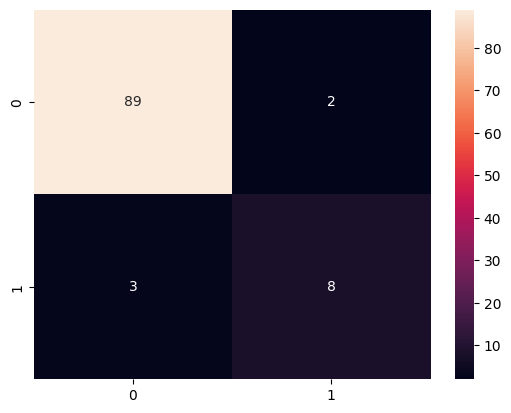

In [ ]:
predictions = automl.predict(X_test)
print(classification_report(y_test, predictions))
cf = confusion_matrix(y_test, predictions)
sns.heatmap(cf, annot=True);